<a href="https://colab.research.google.com/github/ShathaMelhem/AI/blob/main/laptop_price_EDA1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impotring Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [99]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/laptop-price-prediction-cleaned-dataset


In [100]:
df = pd.read_csv('/kaggle/input/laptop-price-prediction-cleaned-dataset/laptop_data_cleaned.csv')


# Discovering Dataset

In [101]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [102]:
df.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [104]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [105]:
# Total number of missing values of each column

df_null=df.isnull().sum()
df_null[df_null>0]
 # no nulls


,0


In [106]:
# Total number of missing values
df_null_sum=df.isnull().sum().sum()
print("Total missing values:", df_null_sum)
#no missing values

Total missing values: 0


In [107]:
percent=df.isnull().mean()*100
print(percent[percent>0])

Series([], dtype: float64)


In [108]:
duplicates=df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 1


In [109]:
df.shape

(1273, 13)

In [110]:
df.count()

,0
Company,1273
TypeName,1273
Ram,1273
Weight,1273
Price,1273
TouchScreen,1273
Ips,1273
Ppi,1273
Cpu_brand,1273
HDD,1273


In [113]:
df['Os'].value_counts()

,count
Os,
Windows,1100
Others,152
Mac,21


In [114]:
df['Cpu_brand'].value_counts()

,count
Cpu_brand,
Intel Core i7,515
Intel Core i5,423
Other Intel Processor,141
Intel Core i3,134
AMD Processor,60


In [115]:
df['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,703
Nvidia,396
AMD,174


In [117]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,706
Gaming,205
Ultrabook,194
2 in 1 Convertible,116
Workstation,29
Netbook,23


In [118]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,8


# Seperate Numerical and Categorical Data

In [119]:
cat_col=df.select_dtypes(include=['object'])
cat_col.columns


Index(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype='object')

In [120]:
num_col=df.select_dtypes(include=['number'])
num_col.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'], dtype='object')

# EDA

## Univariate analysis
to study each variable alone

histogram used to study the frequency distributions and the number of observations within each given numerical variable.

my observations are:
1.    pricr is symmetric
2.    weight,ram,Ppi are are skewed to right
2.    ssd and weight are bimodel

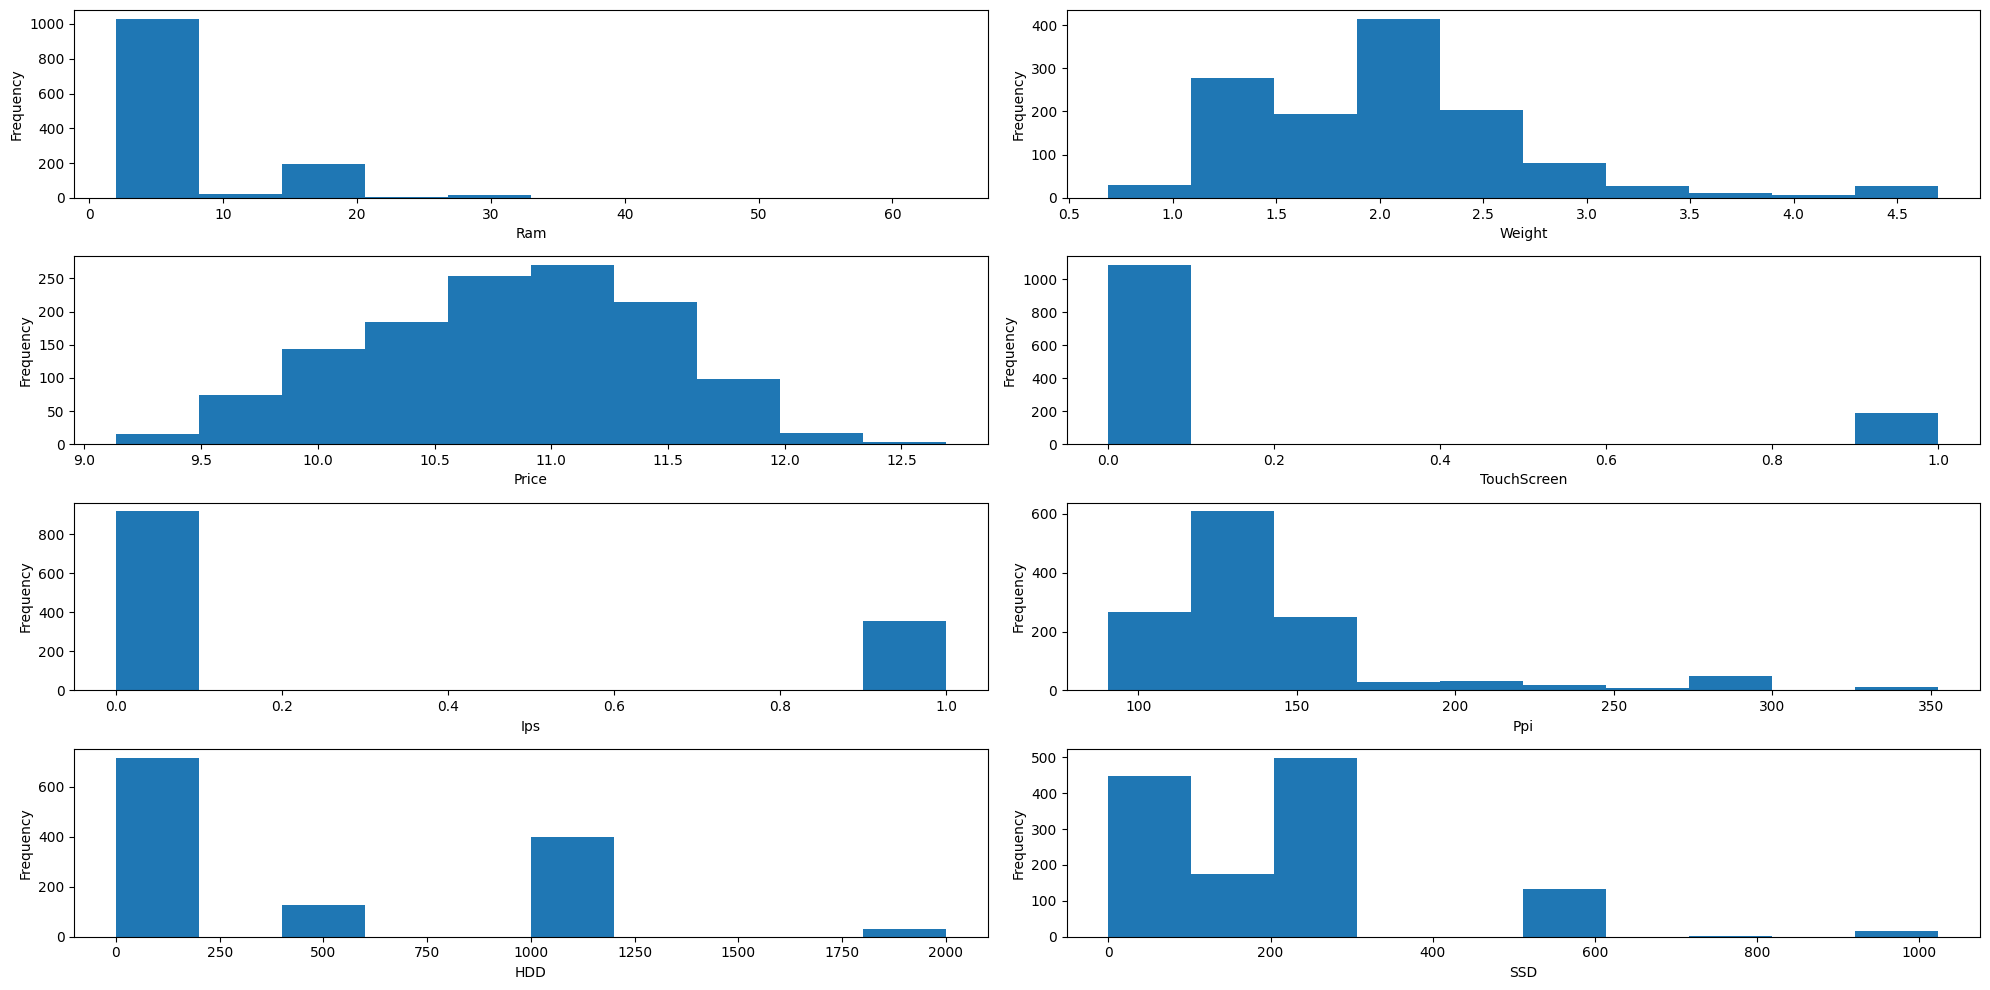

In [122]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(4, 2, i+ 1)
    plt.hist(x= df[col])

    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

here, we plot histograms using seaborn lib   

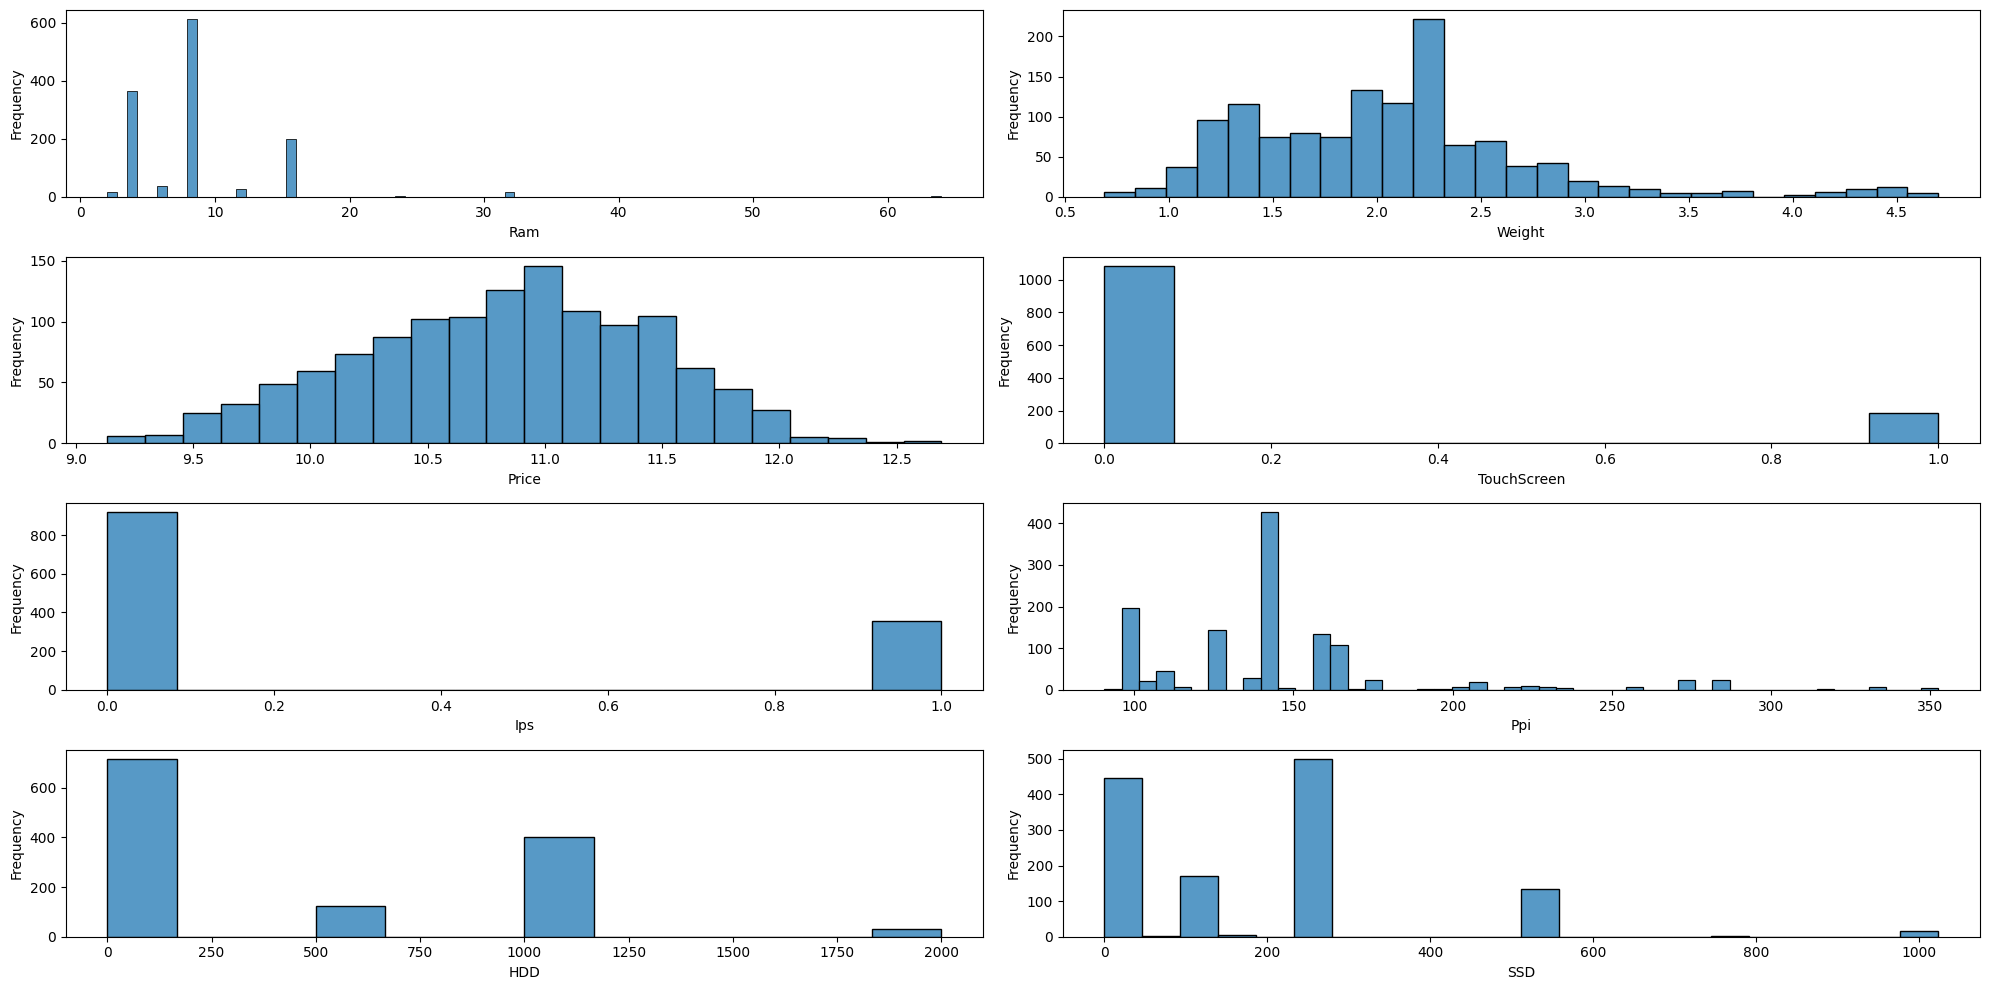

In [124]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(4,2, i+ 1)
    sns.histplot(x= df[col])
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

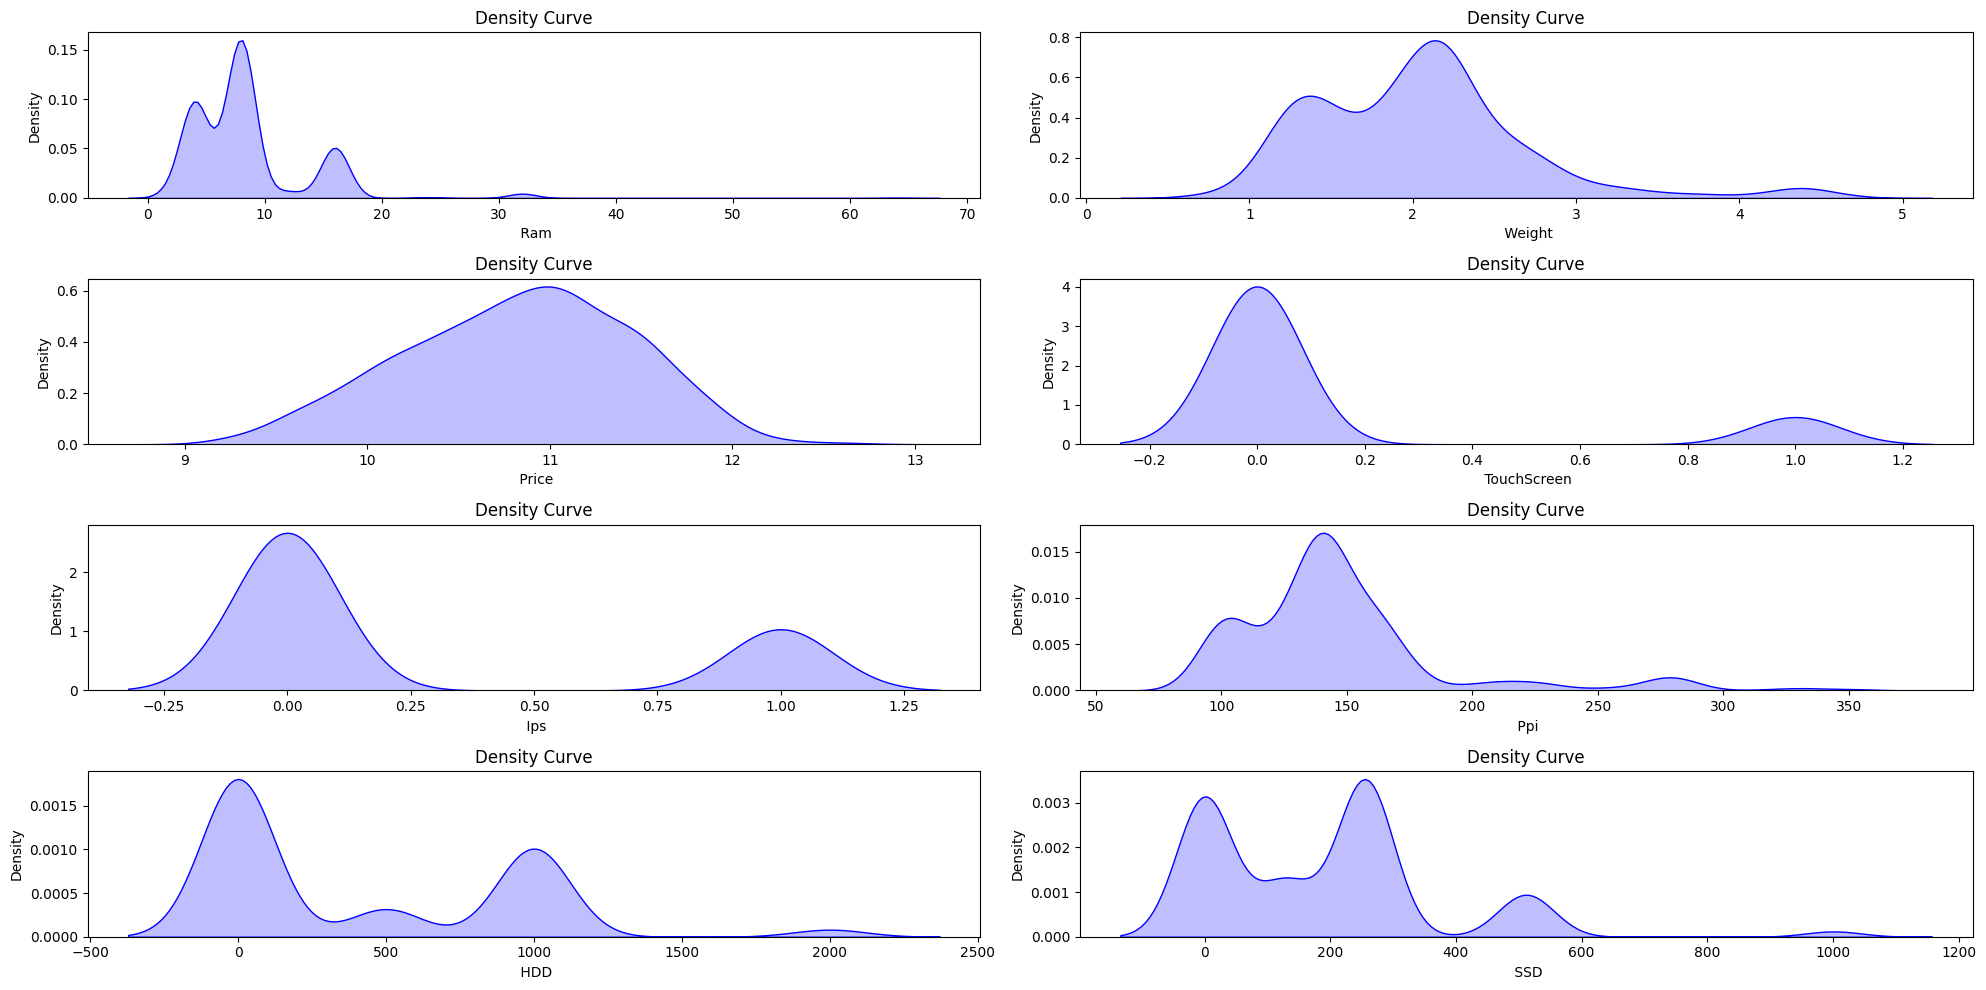

In [126]:
#Density curve (KDE):,numerical data ....continuous
plt.figure(figsize= (20, 10))

for i, col in enumerate(num_col):
    plt.subplot(4,2, i+ 1)
    sns.kdeplot(df[col], color='blue',fill=True)
    plt.title('Density Curve')
    plt.xlabel(f" {col}")
    plt.ylabel('Density')
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()



box plot to study each num var each alone to discovre the outliers perfectly, hence the hist may not be clear enough to show them
***there are outliers in all vars except ips ad hdd

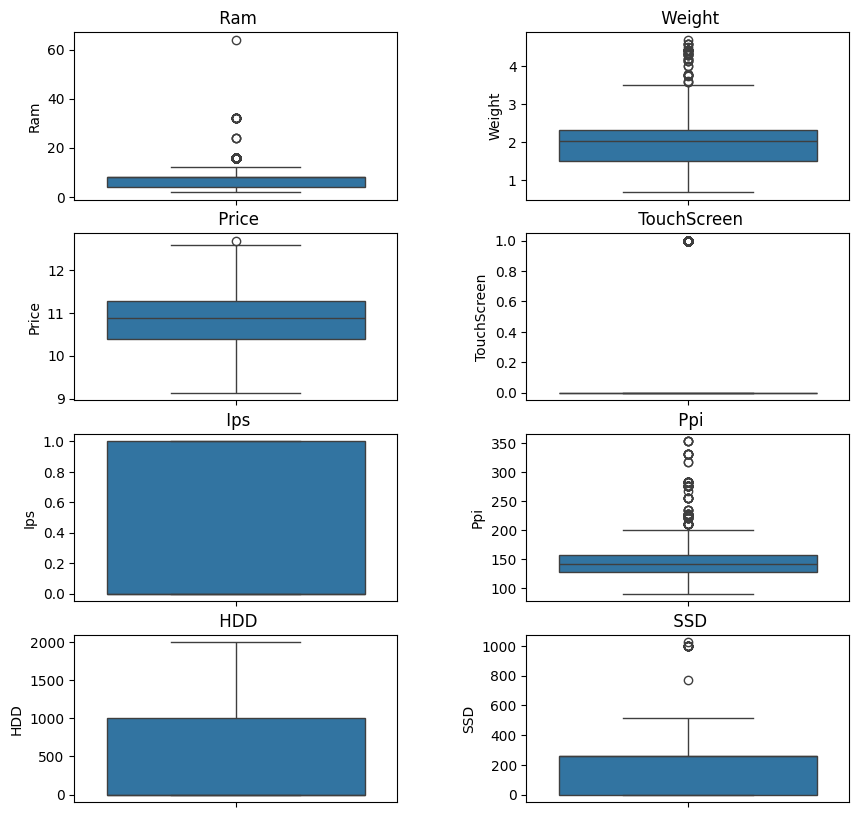

In [127]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(4,2, i+ 1)
    sns.boxplot(data= df[col])
    plt.subplots_adjust(wspace=0.4)
    plt.title(f" {col}")
plt.show()

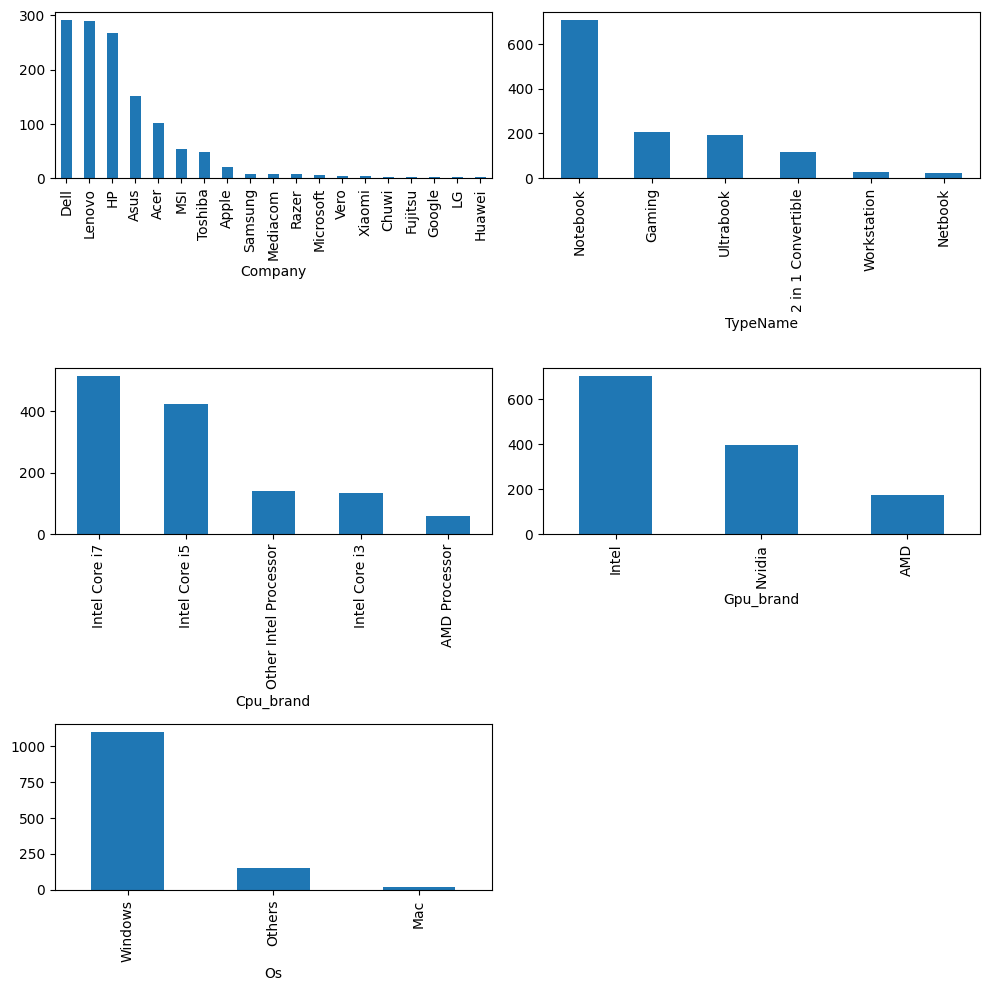

In [129]:
#bar plot :categorical data
plt.figure(figsize= (10, 10))
for i, col in enumerate(cat_col):

    plt.subplot(3, 2, i + 1)
    df[col].value_counts().plot(kind='bar')

# Add a call to plt.tight_layout() to prevent labels from overlapping
plt.tight_layout()
plt.show()

pie chart to define the percantage of each category in 8 cat columns


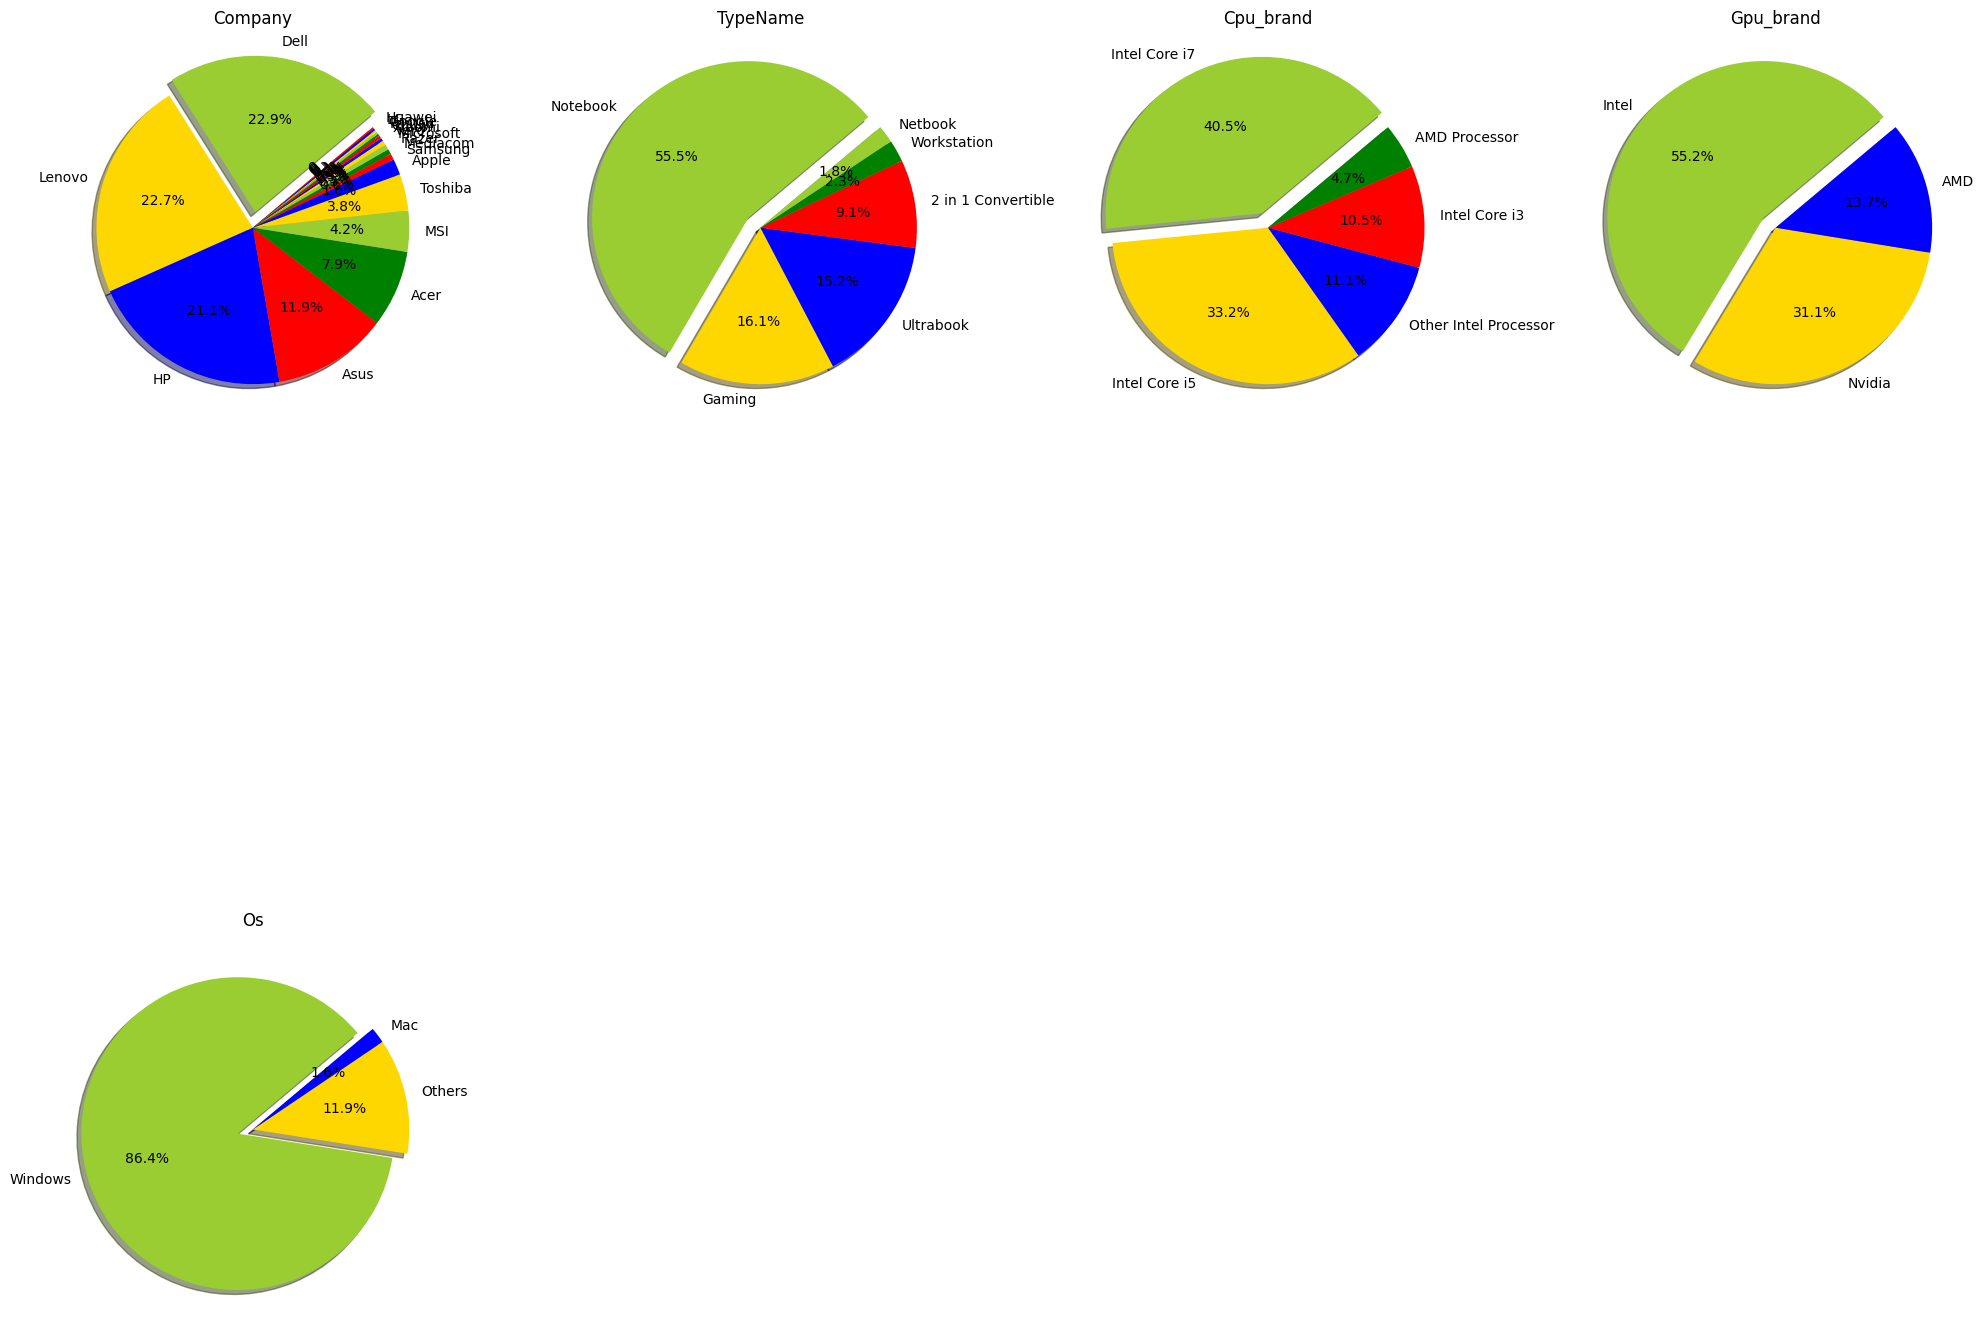

In [130]:
#pie chart :categorical data
plt.figure(figsize= (20, 20))
colors = ['yellowgreen', 'gold','blue','red','green']
for i, col in enumerate(cat_col):
    # Changed subplot grid to 2 rows and 4 columns to accommodate all 8 categorical columns
    plt.subplot(2, 4, i+ 1)
    # Dynamically create the explode tuple based on the number of unique values
    num_unique = df[col].nunique()
    # Ensure there are enough colors for the number of unique values
    current_colors = colors[:num_unique] if num_unique <= len(colors) else colors * (num_unique // len(colors) + 1)

    # Handle cases where there is only one unique value to avoid errors with explode
    #if num_unique > 1:
    explode = tuple([0.1] + [0] * (num_unique - 1))
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index, colors=current_colors,
            explode=explode,autopct='%1.1f%%',  shadow=True, startangle=400)
    plt.title(f"{col}")
   # else:
        # If only one unique value, plot without explode
    #plt.pie(df[col].value_counts(),labels=df[col].value_counts().index, colors=current_colors, shadow=True,autopct='%1.1f%%',  startangle=80)

# Add tight_layout to prevent labels from overlapping
plt.tight_layout()
plt.show()

## Bivariate Analysis
to study each two vars with each other

scatter for num vs num

we can defined that no relationship between them
BETWEEN WEIGHT AND PRICE STRONG POSITIVE RSHIPB


In [131]:
num_col.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'], dtype='object')

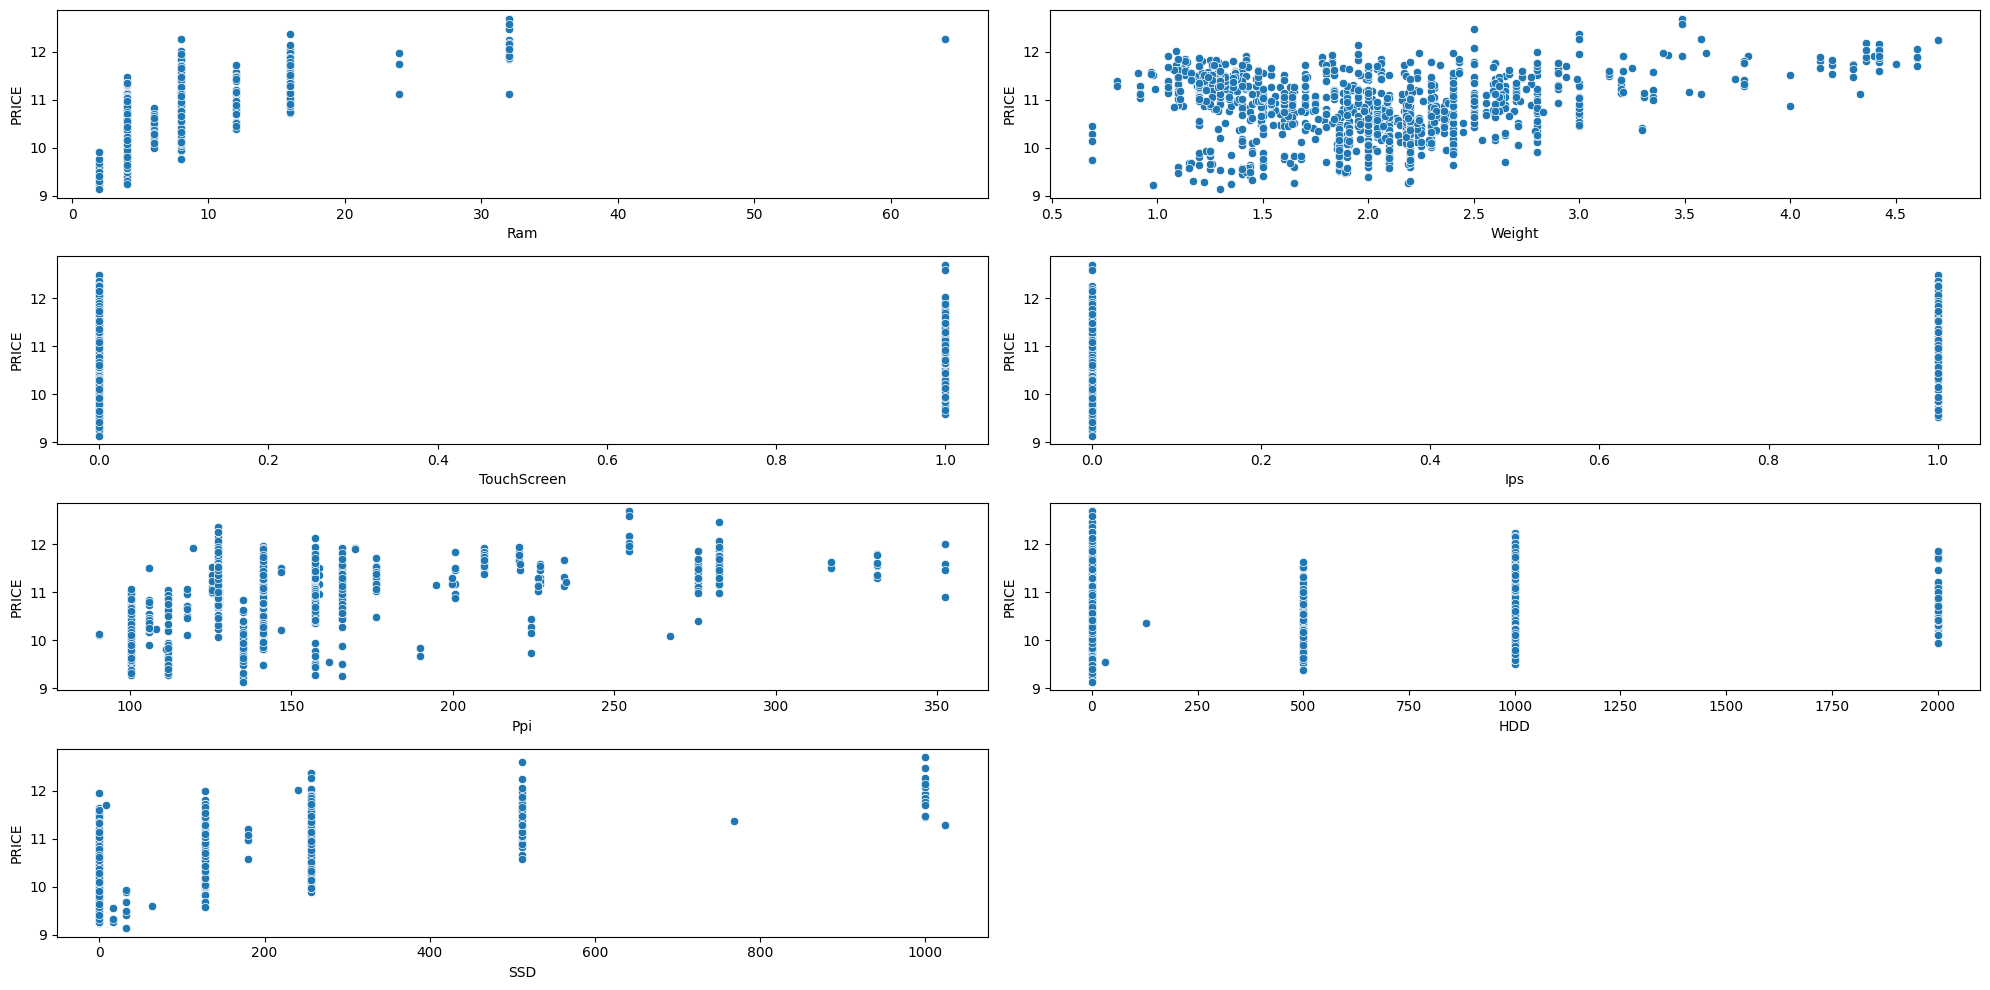

In [137]:
#scatter plot:num vs num
plt.figure(figsize= (20, 10))
columns = list(num_col)
columns.remove('Price')


for i, col in enumerate(columns, 0):
    plt.subplot(4,2, i+ 1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.xlabel(f"{col}")
    plt.ylabel('PRICE')
    plt.subplots_adjust(wspace=0.2)

plt.tight_layout()

plt.show()




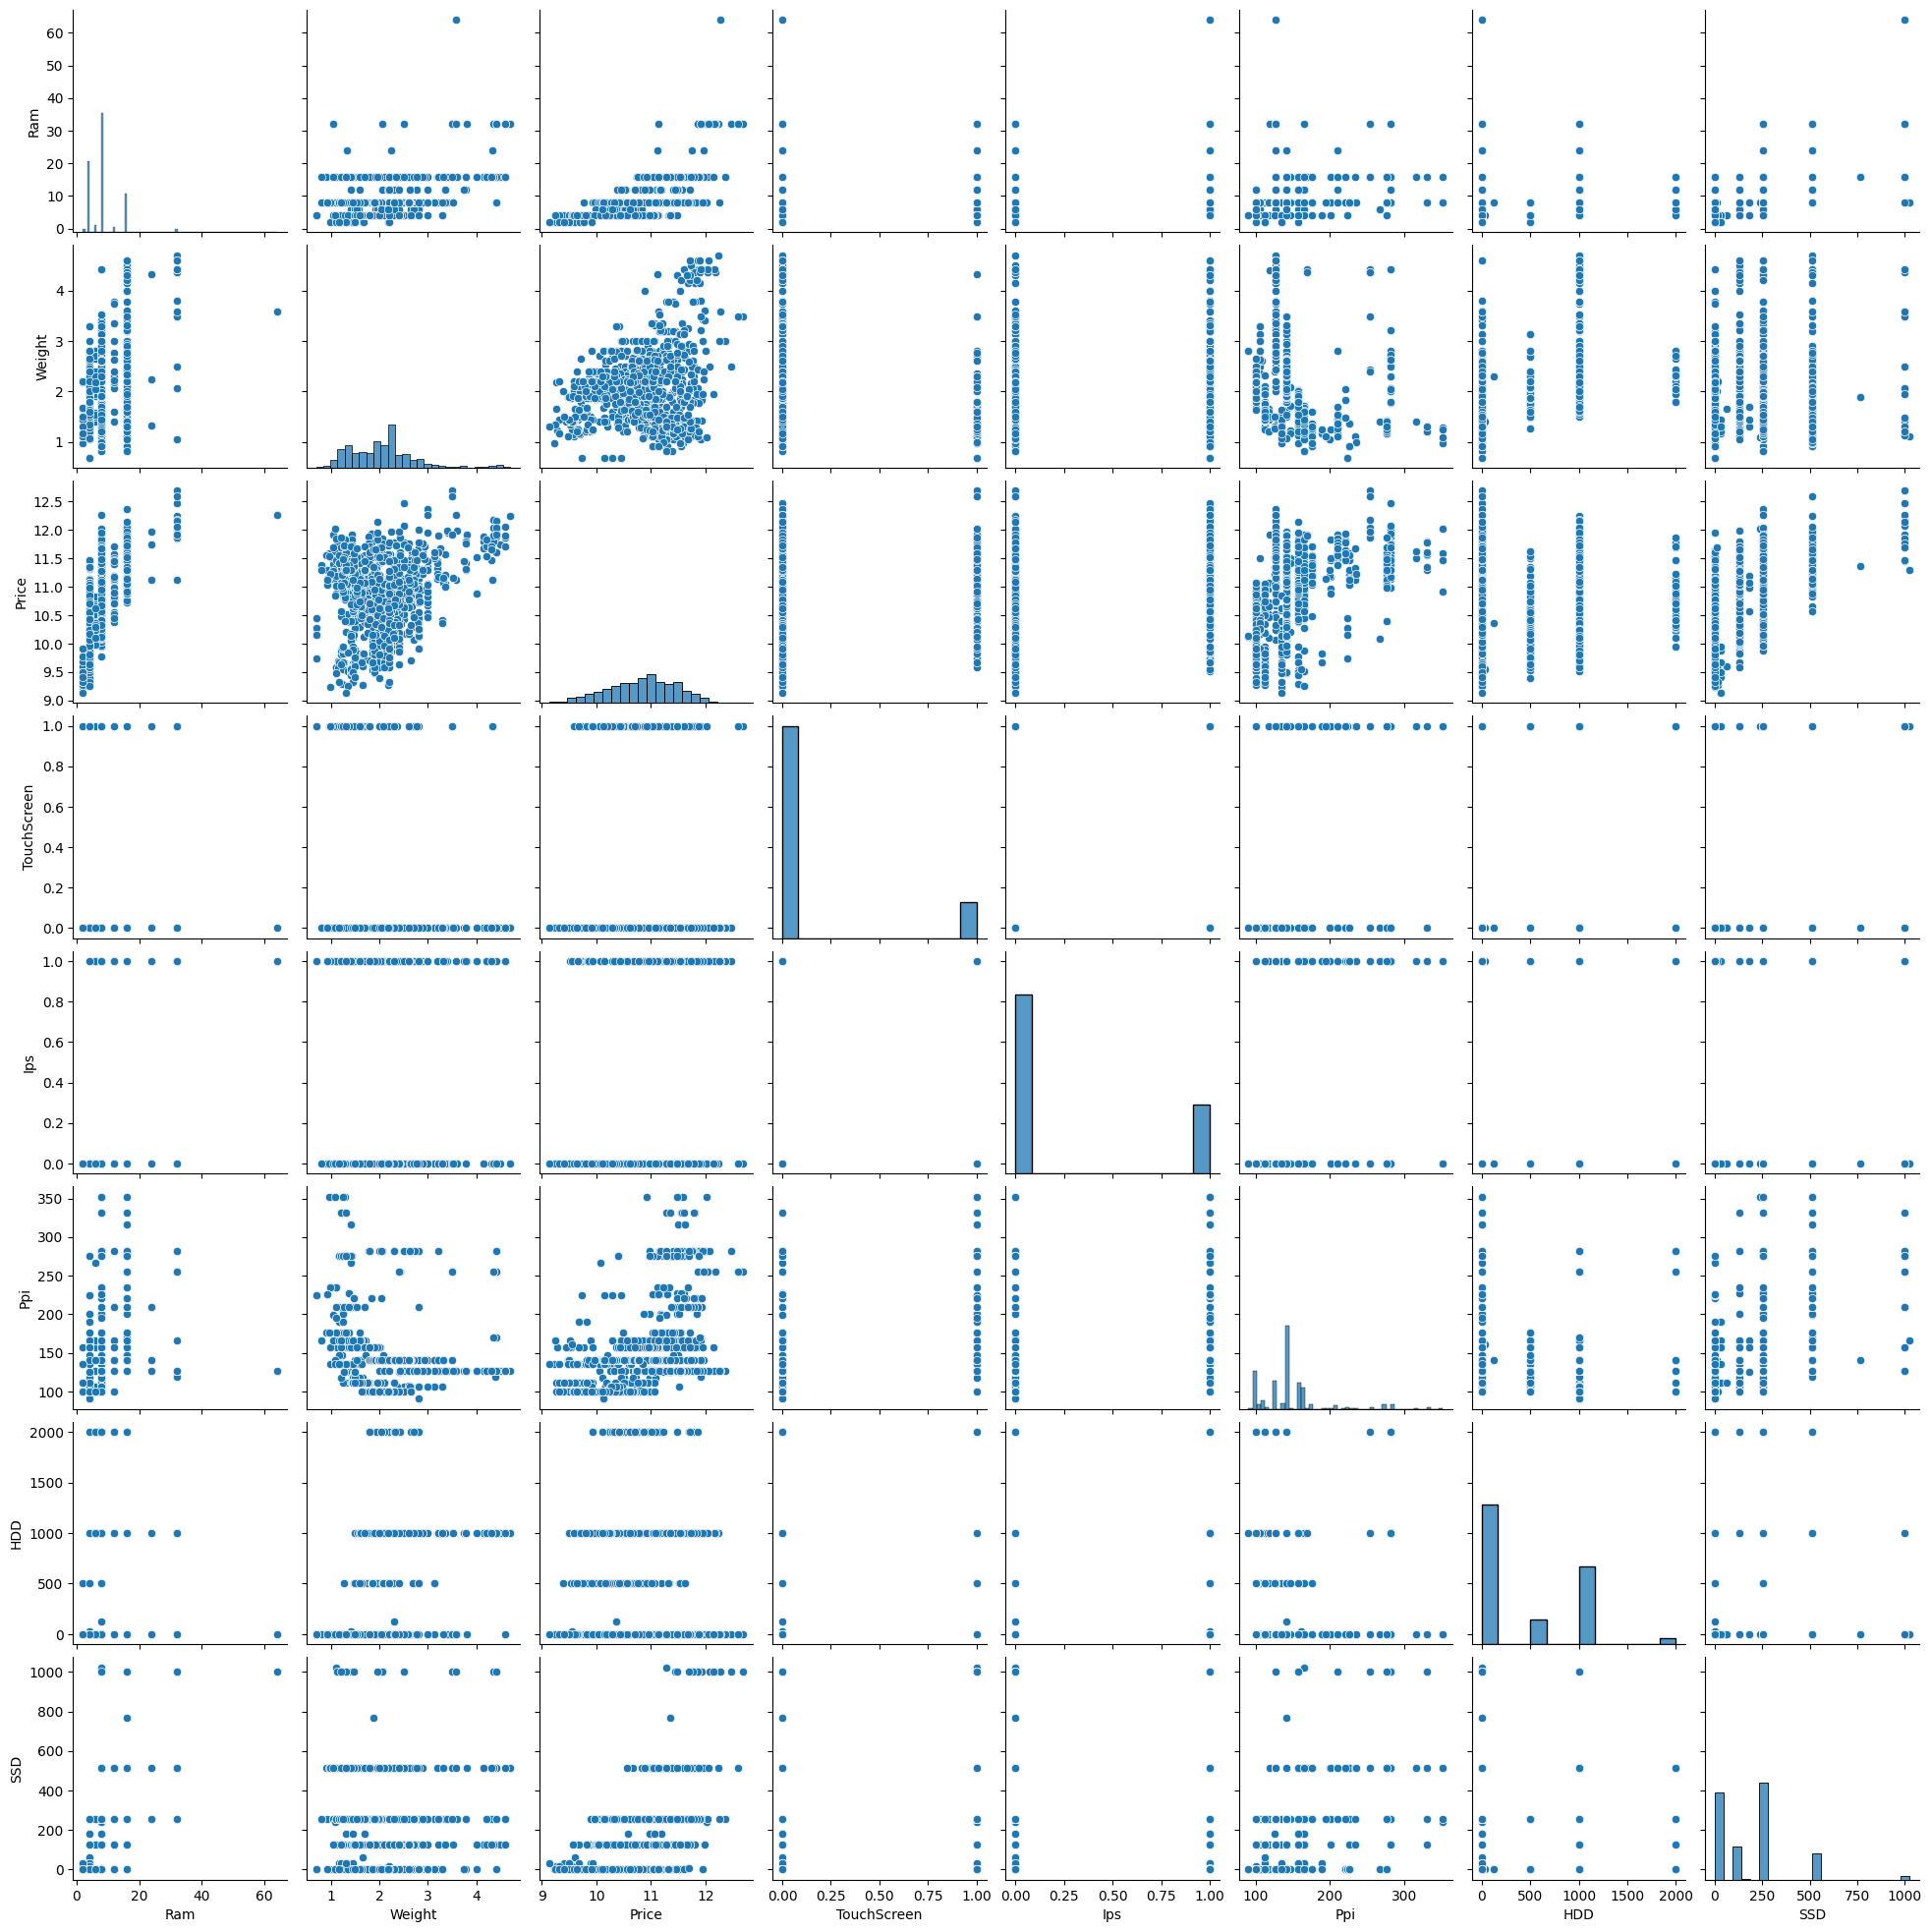

In [132]:
#scatter plot:num vs num
sns.pairplot(num_col)
plt.show()

comparison between the catagroies of cp, i notice that  highest number of patients has asymptomatic. most patients who have ST depression induced by exercise relative to rest also have asymptomatic and ca (number of major vessels)

In [139]:
cat_col.columns

Index(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype='object')

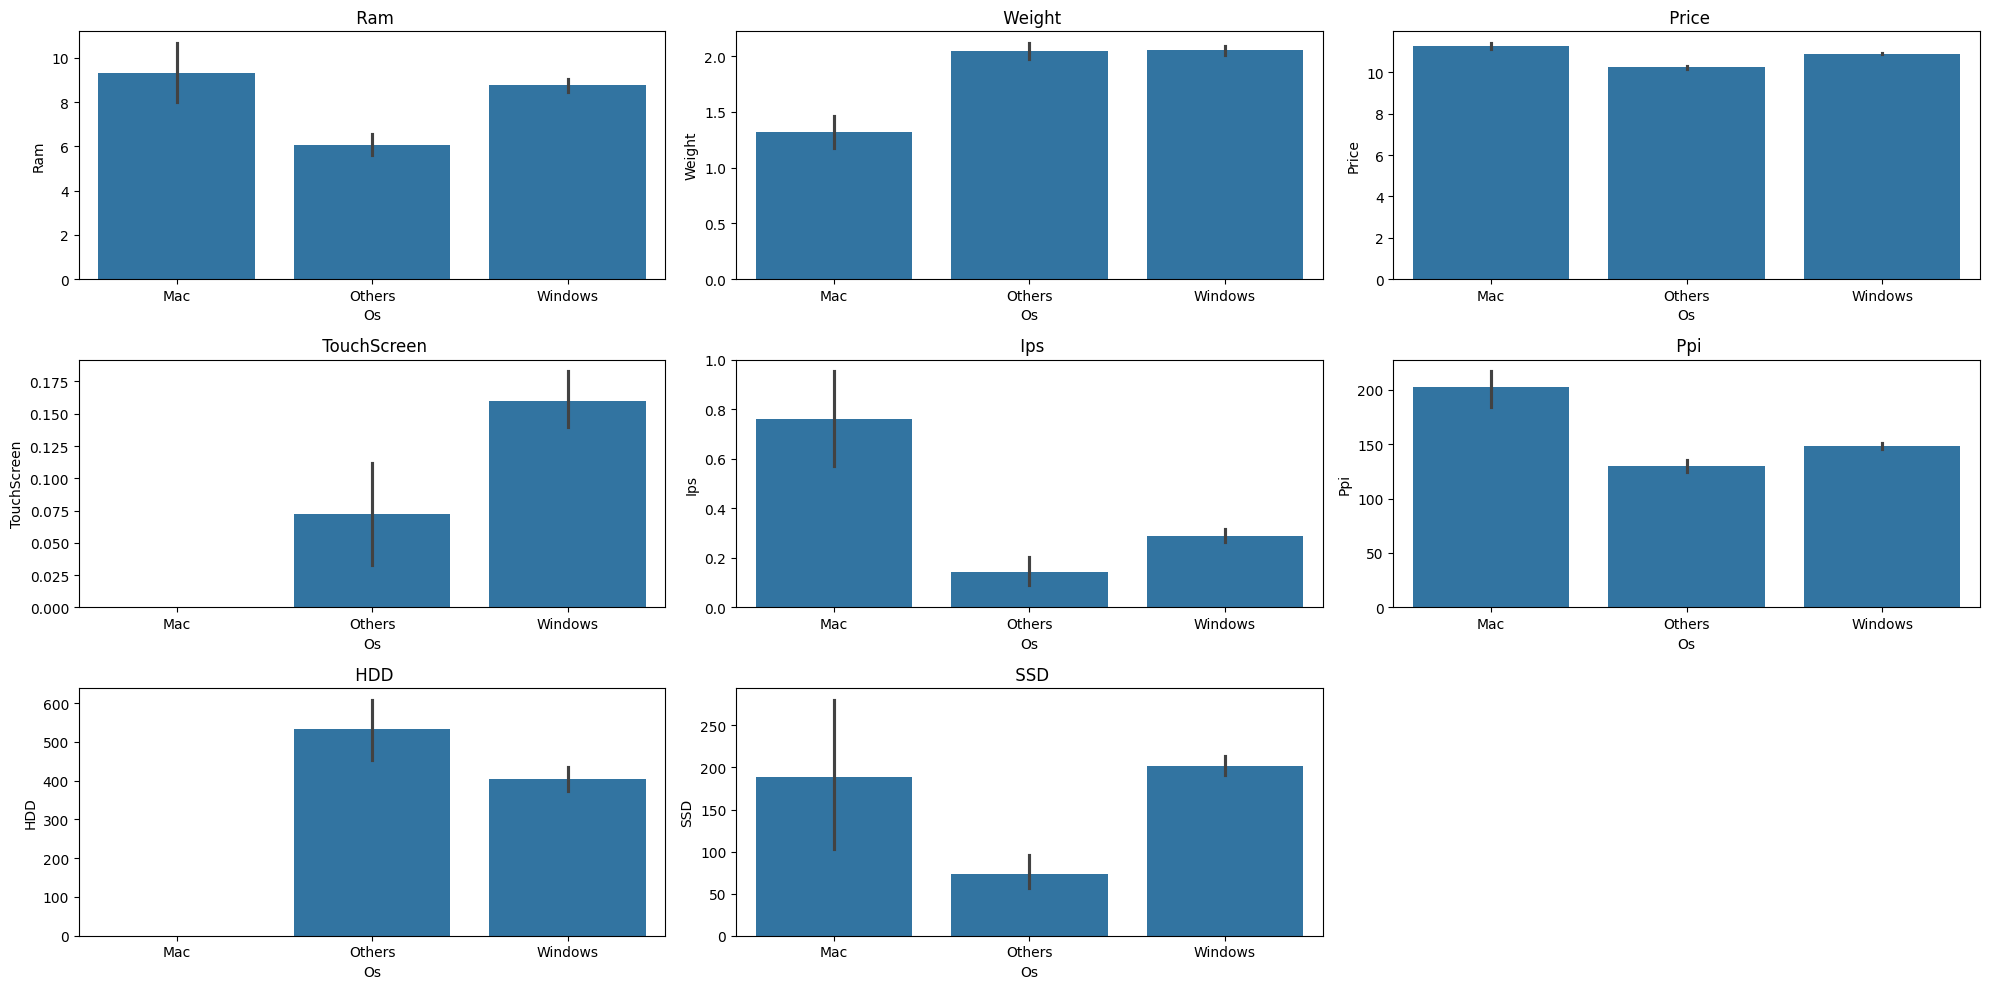

In [147]:
#bar chart:cat vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['Os'], y=df[col])

    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()


comparison between the catagroies of stages of heart diseas (0,1,2,3,4) colm with each num colm
** where box plot show the outliers,



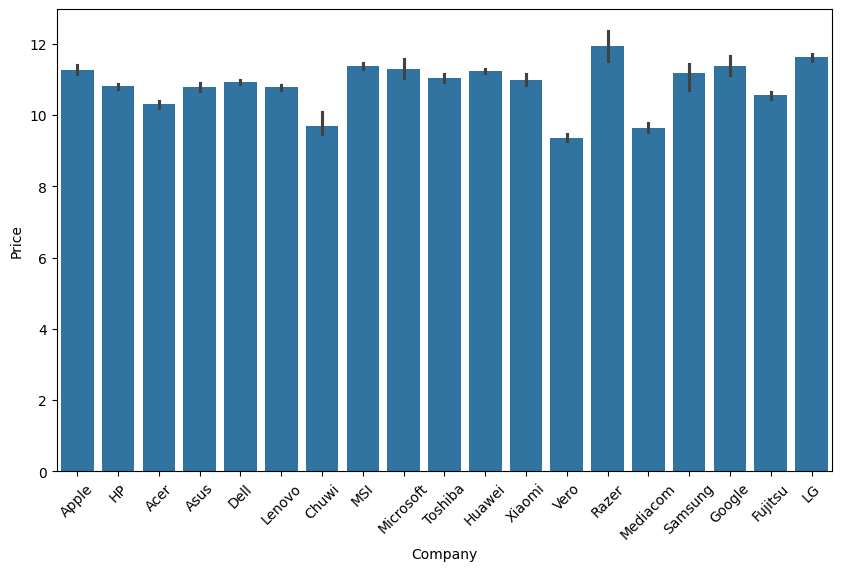

In [145]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Company')
plt.ylabel('Price')
plt.show()

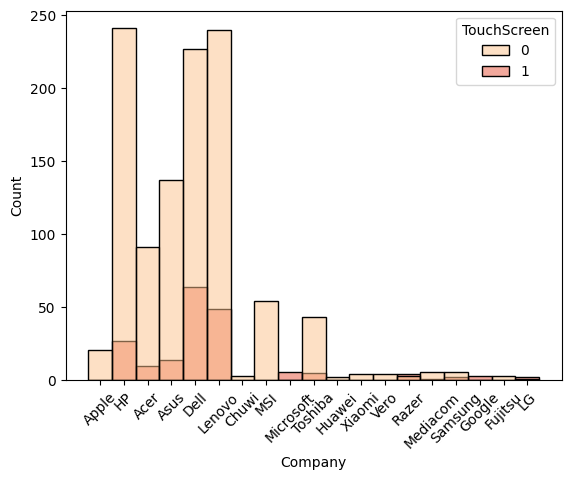

In [146]:
sns.histplot(data=df, x="Company", hue="TouchScreen", palette="OrRd")
plt.xticks(rotation=45)
plt.show()

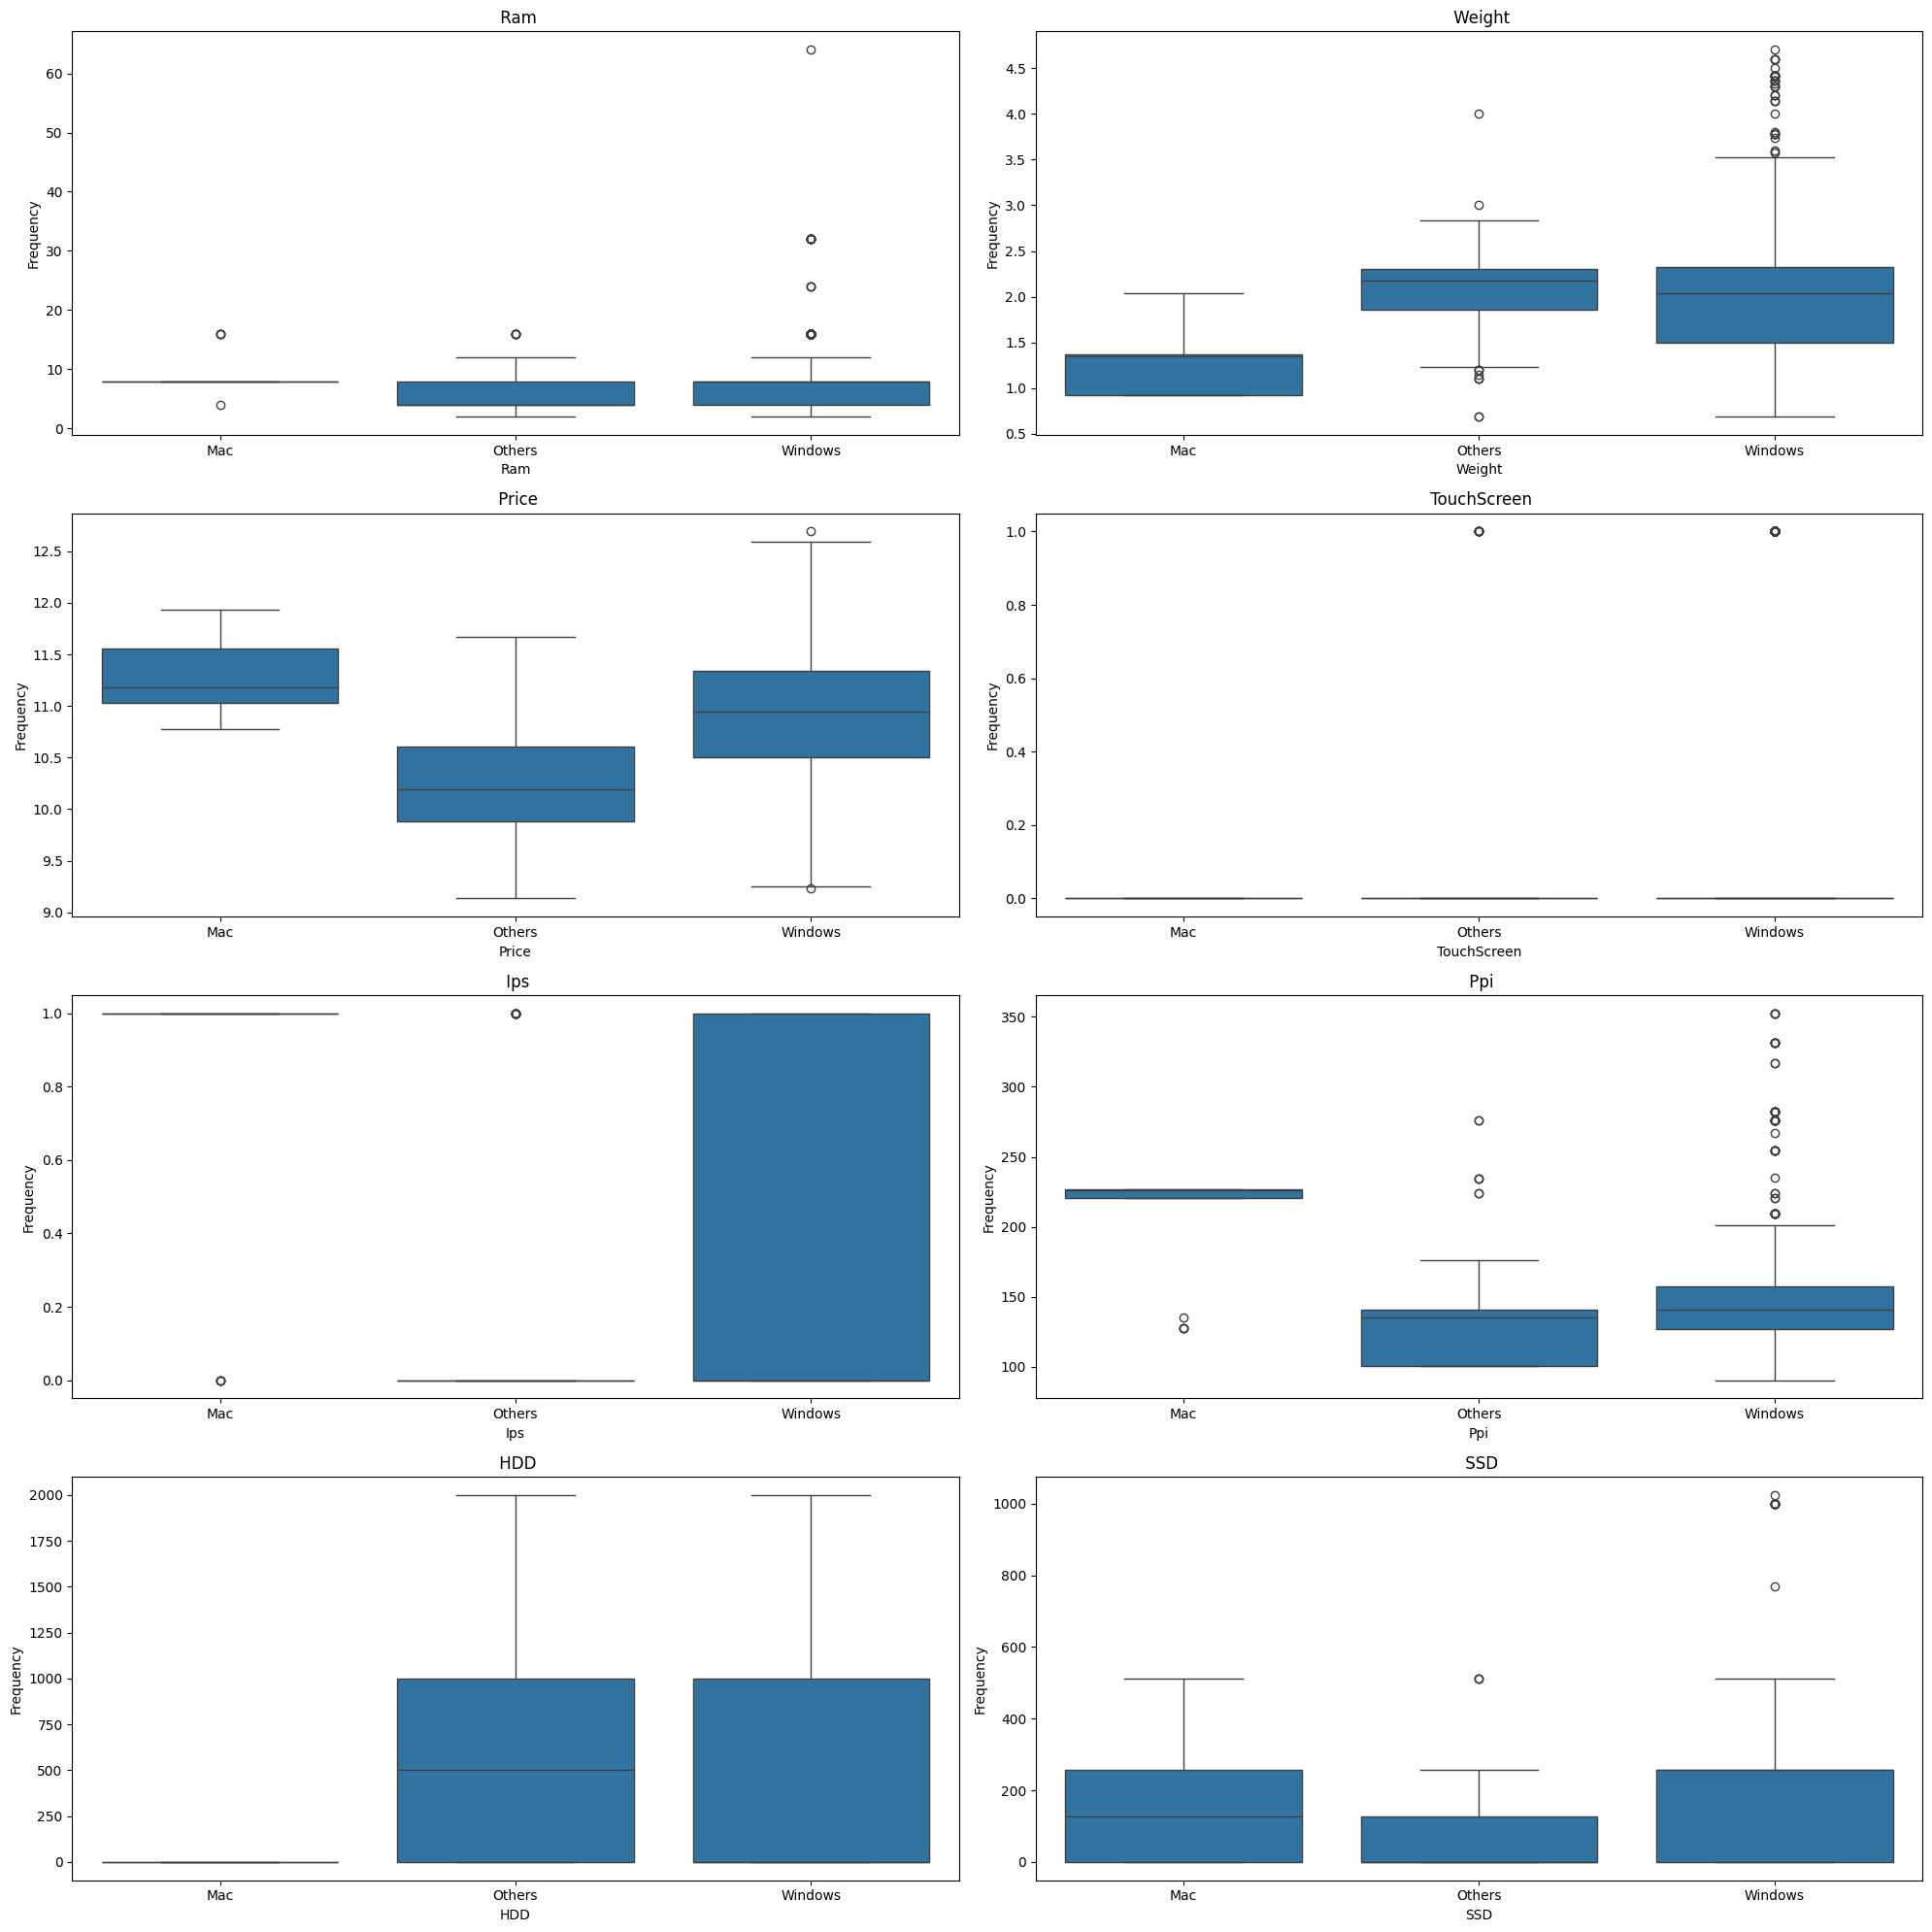

In [150]:
#box plot: cat vs num
plt.figure(figsize= (20, 20))
for i, col in enumerate(num_col):
    plt.subplot(4,2, i+ 1)
    sns.boxplot(x=df['Os'], y=df[col])
    plt.title(f" {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()

plt.show()

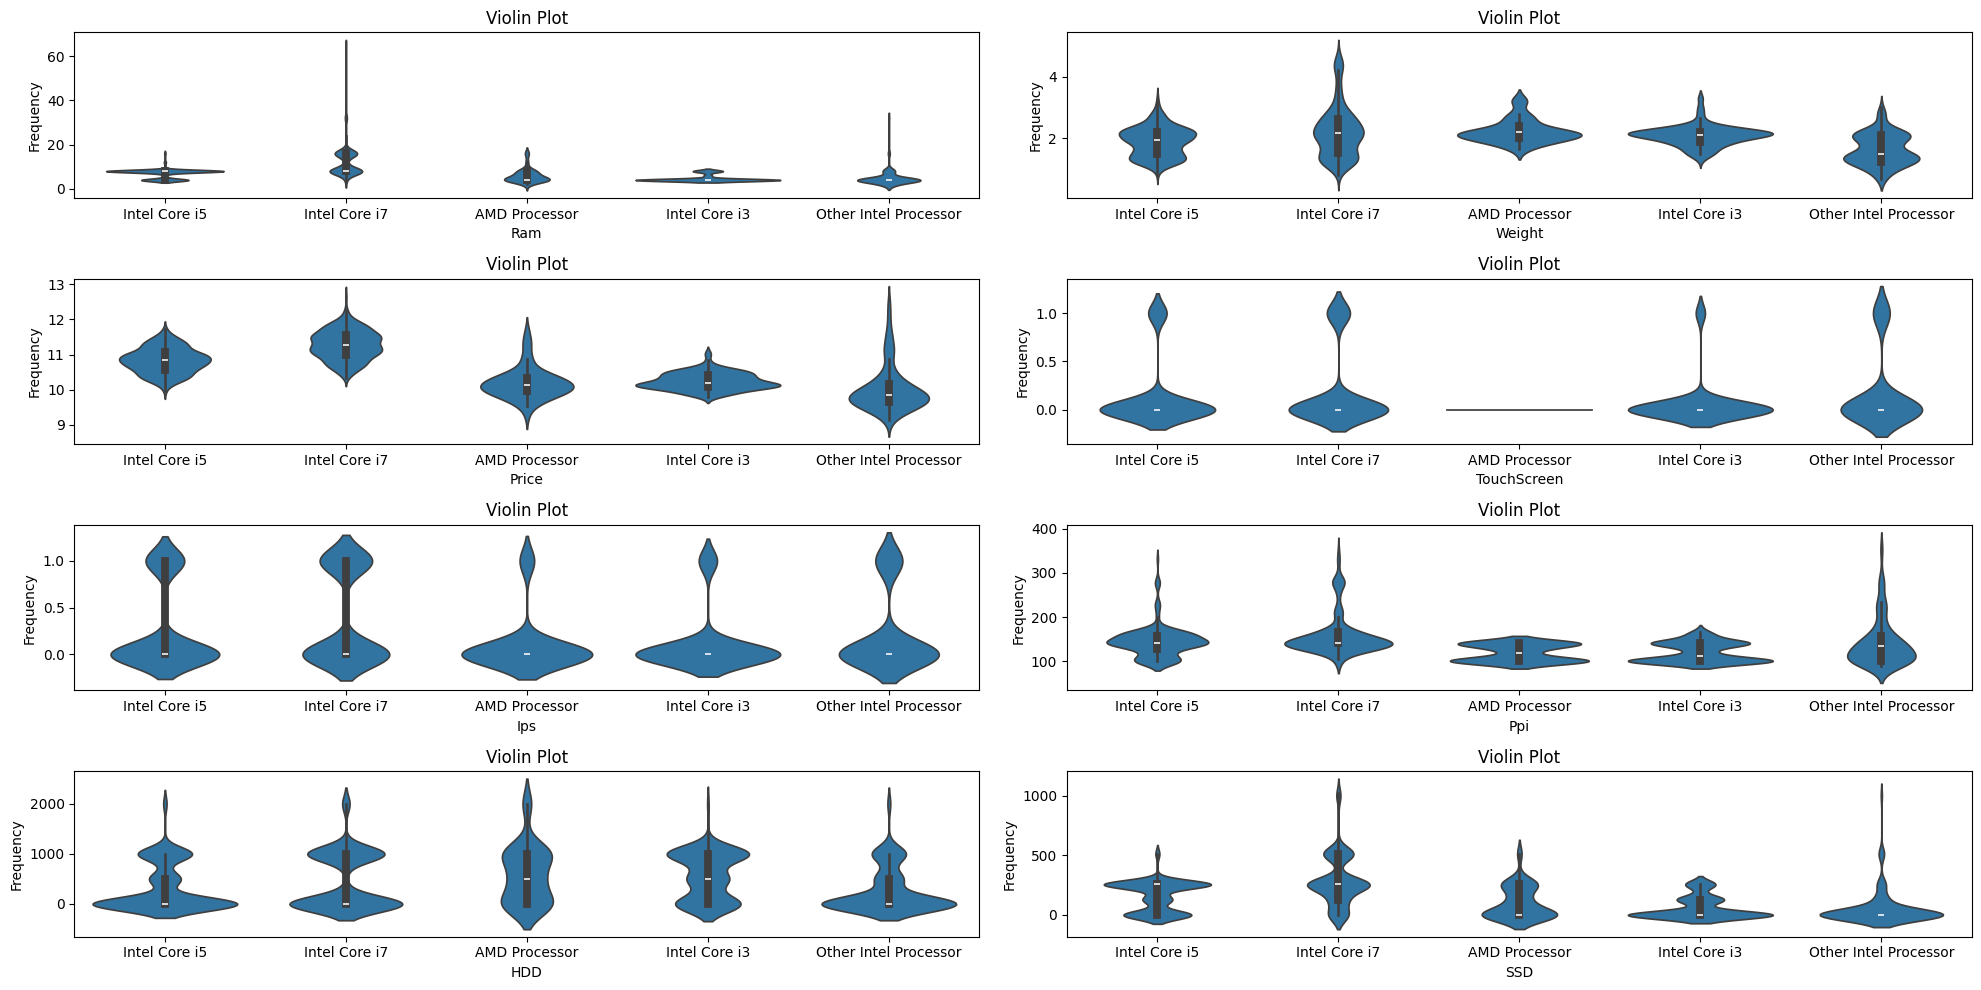

In [151]:
#vio
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(4, 2, i+ 1)
    sns.violinplot(x=df['Cpu_brand'], y=df[col])
    plt.title('Violin Plot')
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

## Multivariate Analysis

heat map used to discover the relationship between all num variables

strong positive rship between price and ssd, price and ram

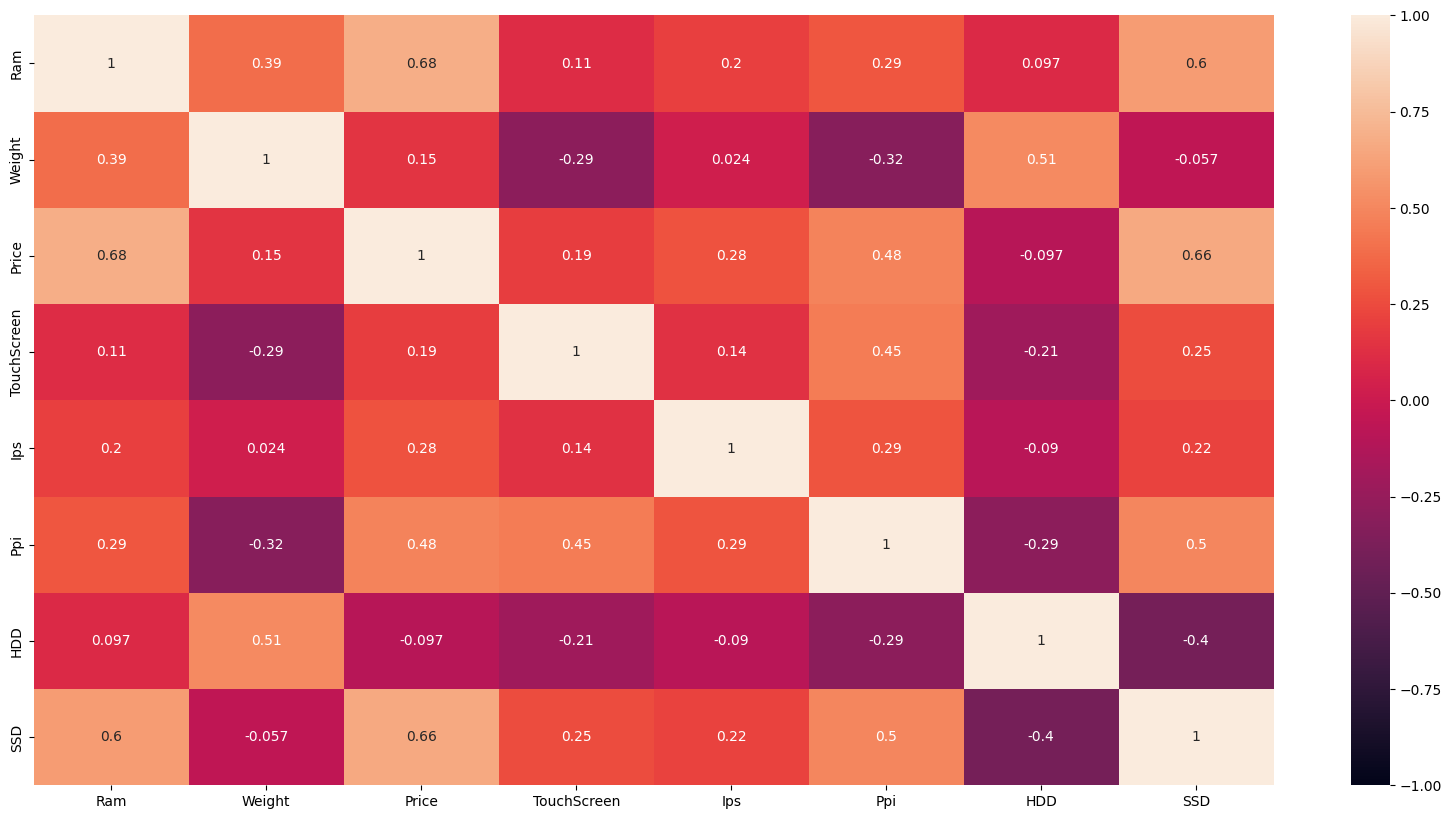

In [143]:
plt.figure(figsize= (20, 10))
sns.heatmap(data=num_col.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [144]:
df.corr(numeric_only=True)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000
